In [17]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [3]:
train_df = pd.read_excel("F:\\UOC\\4th Year\\ST 4052 - Statistical Learning II\\Project 1\\SVM\\output_train.xlsx")
test_df = pd.read_excel("F:\\UOC\\4th Year\\ST 4052 - Statistical Learning II\\Project 1\\SVM\\output_test.xlsx")

In [5]:
train_df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,68,5
1,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,52,5
2,3,2,1,2,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,25,2
3,1,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,55,5
4,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,56,5


In [7]:
test_df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,1,1,0,1,3,0,0,0,0,0,...,0,0,2,0,0,0,2,0,40,4
1,2,2,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,33,2
2,2,2,2,0,0,0,2,0,2,0,...,0,0,0,0,2,2,2,0,8,6
3,3,3,2,1,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,37,2
4,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2


In [9]:
# Separate features and target
X_train = train_df.drop(columns=['class'])
y_train = train_df['class']
X_test = test_df.drop(columns=['class'])
y_test = test_df['class']

In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

In [19]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

In [21]:
# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [31]:
# Calculate predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [33]:
# Compute accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 100.00%
Test Accuracy: 96.67%


In [35]:
# Detailed evaluation on test set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test):
              precision    recall  f1-score   support

           2       0.90      1.00      0.95         9
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [41]:
# Detailed evaluation on test set
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))


Classification Report (Train):
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        17

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



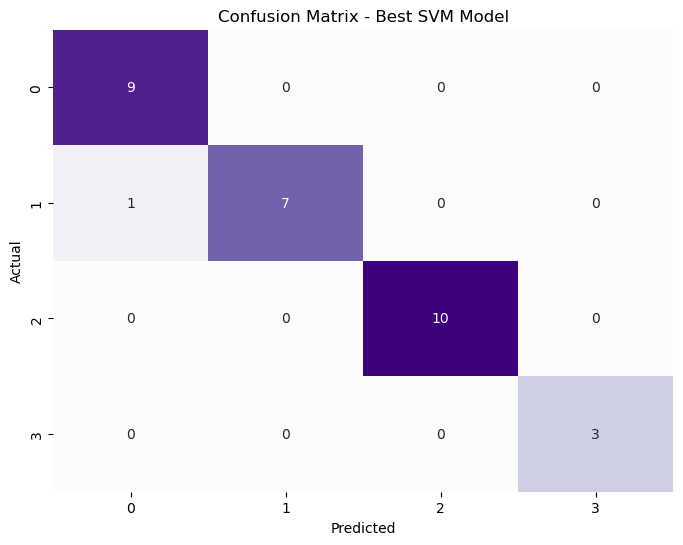

In [39]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Best SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()